In [4]:
from numpy import *
import pylab
from scipy import integrate
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import fsolve

In [6]:
c_down = lambda c: 1 - c
c_up = lambda c: c
theta_down = lambda b, c: b / (2 * (1 - c))
theta_up = lambda b, c: b / ((2 * c))

For different $q_a$ and $q_c$

In [2]:
from numpy import *
import pylab
from scipy import integrate
# Definition of parameters
p = 0.03
k = 50
q_a = 4
q_c = 10
def dX_dt(t, X, p):
    c = X[0]
    b = X[1]
    return array([ (1 - p) * (c_down(c) * theta_down(b, c) ** q_c - c_up(c) * theta_up(b ,c) ** q_c) + p * (c_down(c) * ( 1 - theta_down(b, c)) ** q_a - c_up(c) * (1 - theta_up(b, c)) ** q_a) ,
                    2 / k * (c_down(c) * ((1 - p) * theta_down(b, c) ** q_c * (k - 2 * q_c - 2 * (k - q_c) * theta_down(b, c)) + p * (1 - theta_down(b, c)) ** q_a * (k - 2 * (k - q_a) * theta_down(b, c))) + 
                    c_up(c) * ((1 - p) * theta_up(b, c) ** q_c * (k - 2 * q_c - 2 * (k - q_c) * theta_up(b, c)) + p * (1 - theta_up(b, c)) ** q_a * (k - 2 * (k - q_a) * theta_up(b, c)))) ])
    

In [3]:
P = linspace(0, 0.07, 100)
t = linspace(0, 10000,  10000)
Stable_states = ones(size(P))
for i, p in enumerate(P):
    X0 = array([0.999, 1 - 0.999])                 # initials conditions
    sol = integrate.solve_ivp(dX_dt, [0, 10000], X0, args = [p], dense_output = True)
    c, b = sol.sol(t)
    Stable_states[i] = c[-1]

KeyboardInterrupt: 

trying to calculate c vs p

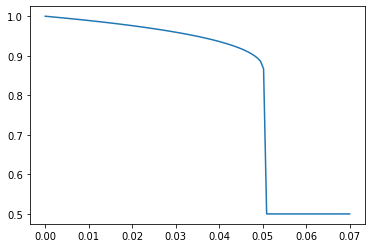

In [7]:
plt.plot(P, Stable_states)

In [13]:
P = linspace(0, 0.07, 100)
t = linspace(0, 10000,  10000)
Stable_states = ones(size(P))
for i, p in enumerate(P):
    X0 = array([0.5001, 0.1])                 # initials conditions
    sol = integrate.solve_ivp(dX_dt, [0, 10000], X0, args = [p], dense_output = True)
    c, b = sol.sol(t)
    Stable_states[i] = c[-1]

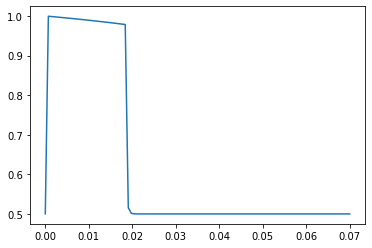

In [15]:
plt.plot(P, Stable_states)

# Figure 2 PA model

In [4]:
import scipy.optimize as optimize
q_a = 4
q_c = 10
k = 50
p = 0.03
c_down = lambda c: 1 - c
c_up = lambda c: c
theta_down = lambda b, c: b / (2 * (1 - c))
theta_up = lambda b, c: b / ((2 * c))

In [5]:
def f(b):
    eq1 = (1 - p) * (c_down(c) * theta_down(b, c) ** q_c - c_up(c) * theta_up(b ,c) ** q_c) + p * (c_down(c) * ( 1 - theta_down(b, c)) ** q_a - c_up(c) * (1 - theta_up(b, c)) ** q_a)
    eq2 = 2 / k * (c_down(c) * ((1 - p) * theta_down(b, c) ** q_c * (k - 2 * q_c - 2 * (k - q_c) * theta_down(b, c)) + p * (1 - theta_down(b, c)) ** q_a * (k - 2 * (k - q_a) * theta_down(b, c))) + 
                        c_up(c) * ((1 - p) * theta_up(b, c) ** q_c * (k - 2 * q_c - 2 * (k - q_c) * theta_up(b, c)) + p * (1 - theta_up(b, c)) ** q_a * (k - 2 * (k - q_a) * theta_up(b, c))))
    return eq2 - eq1

c:\Users\andrz\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The number of calls to function has reached maxfev = 600.
  warnings.warn(msg, RuntimeWarning)
c:\Users\andrz\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
c:\Users\andrz\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


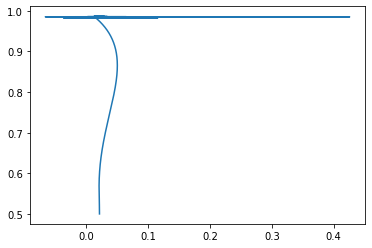

In [11]:
P = ones(10000)
for i, c in enumerate(linspace(0.5001, 0.9999, 10000)):
    def equations(vars):
        p, b = vars
        eq1 = (1 - p) * (c_down(c) * theta_down(b, c) ** q_c - c_up(c) * theta_up(b ,c) ** q_c) + p * (c_down(c) * ( 1 - theta_down(b, c)) ** q_a - c_up(c) * (1 - theta_up(b, c)) ** q_a)
        eq2 = 2 / k * (c_down(c) * ((1 - p) * theta_down(b, c) ** q_c * (k - 2 * q_c - 2 * (k - q_c) * theta_down(b, c)) + p * (1 - theta_down(b, c)) ** q_a * (k - 2 * (k - q_a) * theta_down(b, c))) + 
                            c_up(c) * ((1 - p) * theta_up(b, c) ** q_c * (k - 2 * q_c - 2 * (k - q_c) * theta_up(b, c)) + p * (1 - theta_up(b, c)) ** q_a * (k - 2 * (k - q_a) * theta_up(b, c))))
        return [eq1, eq2]
    P[i], _ =  fsolve(equations, (0.055, 0.45))

P_bis = copy(P)

a = pd.Series(P_bis)
a[a < 0.01] = nan
a[a > 0.5] = nan
a = a.interpolate(method='polynomial', order=2)

P_bis = a.to_numpy()
plt.plot(P_bis, linspace(0.5001, 0.9999, 10000))

# Figure 2 right panel

In [37]:
q_a = 4
q_c = 10
k = 150

c:\Users\andrz\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The number of calls to function has reached maxfev = 600.
  warnings.warn(msg, RuntimeWarning)


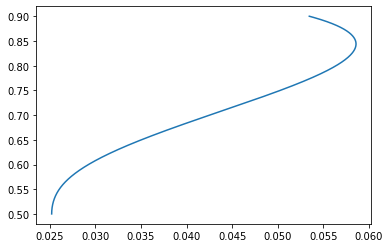

In [40]:
P = ones(1000)
for i, c in enumerate(linspace(0.5001, 0.9, 1000)):
    def equations(vars):
        p, b = vars
        eq1 = (1 - p) * (c_down(c) * theta_down(b, c) ** q_c - c_up(c) * theta_up(b ,c) ** q_c) + p * (c_down(c) * ( 1 - theta_down(b, c)) ** q_a - c_up(c) * (1 - theta_up(b, c)) ** q_a)
        eq2 = 2 / k * (c_down(c) * ((1 - p) * theta_down(b, c) ** q_c * (k - 2 * q_c - 2 * (k - q_c) * theta_down(b, c)) + p * (1 - theta_down(b, c)) ** q_a * (k - 2 * (k - q_a) * theta_down(b, c))) + 
                            c_up(c) * ((1 - p) * theta_up(b, c) ** q_c * (k - 2 * q_c - 2 * (k - q_c) * theta_up(b, c)) + p * (1 - theta_up(b, c)) ** q_a * (k - 2 * (k - q_a) * theta_up(b, c))))
        return [eq1, eq2]
    P[i], _ =  fsolve(equations, (0.055, 0.45))

P_bis = copy(P)

a = pd.Series(P_bis)
a[a < 0.01] = nan
a = a.interpolate(method='polynomial', order=2)

P_bis = a.to_numpy()
plt.plot(P_bis, linspace(0.5001, 0.9, 1000))

# Figure 3

In [41]:
q_a = 10
q_c = 10
k = 50

(0.34, 0.4)

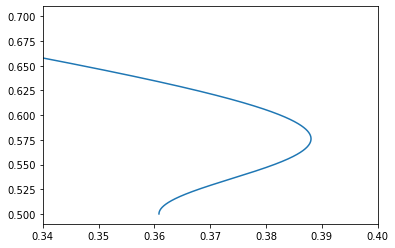

In [48]:
P = ones(1000)
for i, c in enumerate(linspace(0.5001, 0.7, 1000)):
    def equations(vars):
        p, b = vars
        eq1 = (1 - p) * (c_down(c) * theta_down(b, c) ** q_c - c_up(c) * theta_up(b ,c) ** q_c) + p * (c_down(c) * ( 1 - theta_down(b, c)) ** q_a - c_up(c) * (1 - theta_up(b, c)) ** q_a)
        eq2 = 2 / k * (c_down(c) * ((1 - p) * theta_down(b, c) ** q_c * (k - 2 * q_c - 2 * (k - q_c) * theta_down(b, c)) + p * (1 - theta_down(b, c)) ** q_a * (k - 2 * (k - q_a) * theta_down(b, c))) + 
                            c_up(c) * ((1 - p) * theta_up(b, c) ** q_c * (k - 2 * q_c - 2 * (k - q_c) * theta_up(b, c)) + p * (1 - theta_up(b, c)) ** q_a * (k - 2 * (k - q_a) * theta_up(b, c))))
        return [eq1, eq2]
    P[i], _ =  fsolve(equations, (0.38, 0.45))

P_bis = copy(P)

a = pd.Series(P_bis)
a[a < 0.01] = nan
a = a.interpolate(method='polynomial', order=2)

P_bis = a.to_numpy()
plt.plot(P_bis, linspace(0.5001, 0.7, 1000))
plt.xlim((0.34, 0.4))

# Figure 3 right panel 

In [49]:
q_a = 10
q_c = 10
k = 150

(0.34, 0.44)

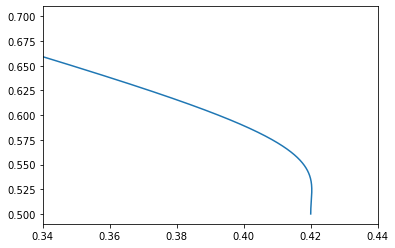

In [51]:
P = ones(1000)
for i, c in enumerate(linspace(0.5001, 0.7, 1000)):
    def equations(vars):
        p, b = vars
        eq1 = (1 - p) * (c_down(c) * theta_down(b, c) ** q_c - c_up(c) * theta_up(b ,c) ** q_c) + p * (c_down(c) * ( 1 - theta_down(b, c)) ** q_a - c_up(c) * (1 - theta_up(b, c)) ** q_a)
        eq2 = 2 / k * (c_down(c) * ((1 - p) * theta_down(b, c) ** q_c * (k - 2 * q_c - 2 * (k - q_c) * theta_down(b, c)) + p * (1 - theta_down(b, c)) ** q_a * (k - 2 * (k - q_a) * theta_down(b, c))) + 
                            c_up(c) * ((1 - p) * theta_up(b, c) ** q_c * (k - 2 * q_c - 2 * (k - q_c) * theta_up(b, c)) + p * (1 - theta_up(b, c)) ** q_a * (k - 2 * (k - q_a) * theta_up(b, c))))
        return [eq1, eq2]
    P[i], _ =  fsolve(equations, (0.38, 0.45))

P_bis = copy(P)

a = pd.Series(P_bis)
a[a < 0.01] = nan
a = a.interpolate(method='polynomial', order=2)

P_bis = a.to_numpy()
plt.plot(P_bis, linspace(0.5001, 0.7, 1000))
plt.xlim((0.34, 0.44))

# Figure 5

In [2]:
q_a = 13
q_c = 10
k = 50

(0.75, 0.85)

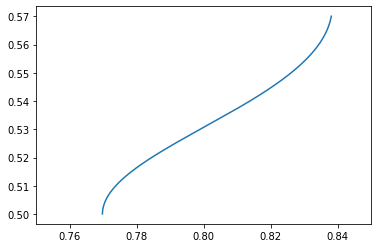

In [9]:
P = ones(1000)
for i, c in enumerate(linspace(0.5001, 0.57, 1000)):
    def equations(vars):
        p, b = vars
        eq1 = (1 - p) * (c_down(c) * theta_down(b, c) ** q_c - c_up(c) * theta_up(b ,c) ** q_c) + p * (c_down(c) * ( 1 - theta_down(b, c)) ** q_a - c_up(c) * (1 - theta_up(b, c)) ** q_a)
        eq2 = 2 / k * (c_down(c) * ((1 - p) * theta_down(b, c) ** q_c * (k - 2 * q_c - 2 * (k - q_c) * theta_down(b, c)) + p * (1 - theta_down(b, c)) ** q_a * (k - 2 * (k - q_a) * theta_down(b, c))) + 
                            c_up(c) * ((1 - p) * theta_up(b, c) ** q_c * (k - 2 * q_c - 2 * (k - q_c) * theta_up(b, c)) + p * (1 - theta_up(b, c)) ** q_a * (k - 2 * (k - q_a) * theta_up(b, c))))
        return [eq1, eq2]
    P[i], _ =  fsolve(equations, (0.38, 0.45))

P_bis = copy(P)

a = pd.Series(P_bis)
a[a < 0.01] = nan
a = a.interpolate(method='polynomial', order=2)

P_bis = a.to_numpy()
plt.plot(P_bis, linspace(0.5001, 0.57, 1000))
plt.xlim((0.75, 0.85))

In [10]:
P_bis

array([0.7697027 , 0.76970346, 0.76970462, 0.76970618, 0.76970813,
       0.76971048, 0.76971322, 0.76971636, 0.7697199 , 0.76972383,
       0.76972816, 0.76973288, 0.769738  , 0.76974351, 0.76974942,
       0.76975573, 0.76976243, 0.76976952, 0.76977701, 0.7697849 ,
       0.76979318, 0.76980186, 0.76981093, 0.76982039, 0.76983025,
       0.7698405 , 0.76985115, 0.76986219, 0.76987362, 0.76988545,
       0.76989767, 0.76991029, 0.7699233 , 0.7699367 , 0.76995049,
       0.76996467, 0.76997925, 0.76999422, 0.77000958, 0.77002534,
       0.77004148, 0.77005801, 0.77007494, 0.77009226, 0.77010996,
       0.77012806, 0.77014655, 0.77016542, 0.77018469, 0.77020434,
       0.77022438, 0.77024482, 0.77026563, 0.77028684, 0.77030844,
       0.77033042, 0.77035278, 0.77037554, 0.77039868, 0.77042221,
       0.77044612, 0.77047041, 0.7704951 , 0.77052016, 0.77054561,
       0.77057144, 0.77059766, 0.77062426, 0.77065124, 0.7706786 ,
       0.77070635, 0.77073448, 0.77076298, 0.77079187, 0.77082